In [228]:
'analysis_results.pkl'
import pandas as pd
import pickle

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots


In [230]:
from tabulate import tabulate

In [231]:
plt.style.use('science')
plt.rcParams['figure.figsize'] = [3.54, 2.36]
dpi = 100
plt.rcParams['savefig.dpi'] = dpi
plt.rcParams['figure.dpi'] = dpi


In [232]:
analysis_results = pd.read_pickle('analysis_results.pkl')

In [233]:
analysis_results

,mse,r2,slope,intercept,fitting_df,carbon_fitting_df,si_fitting_df,c_lines_df,si_lines_df,peak_areas,...,training_carbon_portions,test_carbon_portions,decomposed_df,history,training_x,training_y,test_x,test_y,x_hat,id
0,3.478153e-02,0.974642,1.871084e+06,-5.773544e-01,Carbon Peak...,labels Base...,labels Base...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.299171391865342e-07, 2.892743756950564e-07,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.423105e-02,0.999809,1.354549e+06,-4.142088e-02,Carbon Peak...,labels Baseli...,labels Base...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.1604557774055466e-08, 2.6202205515086672e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.915231e-02,0.993369,6.219761e+10,-3.109881e+10,average_min...,NaN,NaN,NaN,NaN,NaN,...,"[0.4999999999923334, 0.4999999999917018, 0.499...","[0.4999999999923334, 0.4999999999917018, 0.499...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1.924774e-02,0.993219,4.060983e+10,-5.076228e+09,7x7x7_Si_001000 ...,NaN,NaN,NaN,NaN,NaN,...,"[0.12499999999824978, 0.12499999999727293, 0.1...","[0.12499999999824978, 0.12499999999727293, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2.640830e-02,0.758238,1.400834e+04,-1.233756e+00,Carbon Peak...,NaN,NaN,NaN,NaN,"[9.695303820441288e-05, 8.176791650664695e-05,...",...,NaN,NaN,2.00574 2...,NaN,NaN,NaN,NaN,NaN,NaN,4
5,1.012566e-01,0.019136,-1.874347e+05,3.930603e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[0.00020974735, 0.00020910637, 0.00020904932, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.00020974735, 0.00020910637, 0.00020904932, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.11223485514543796, 0.12292678867586204...",5
6,1.330449e-01,0.032152,-7.835098e+06,-6.780311e+02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[-8.656387e-05, -8.6553395e-05, -8.65513e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[-8.656387e-05, -8.6553395e-05, -8.65513e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.2053450712880931, 0.12325378111574992, 0.10...",6
7,3.515353e-04,0.031857,2.463791e+05,-4.634153e-03,Carbon Peak...,labels Basel...,labels Basel...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[1.4766330263841644e-07, 1.4766330263841644e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
8,7.659714e-05,0.877335,9.081817e+05,-2.749258e-02,Carbon Peak...,labels Baselin...,labels Basel...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.757826865554339e-08, 3.066454112890844e-08,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
9,3.434306e-04,0.340004,1.001442e+12,-3.004325e+10,average_min...,NaN,NaN,NaN,NaN,NaN,...,"[0.029999999999999666, 0.029999999999979966, 0...","[0.029999999999999666, 0.029999999999979966, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [234]:
figure_folder = '../../Figures/Analysis/'

In [235]:
def all_results_table(analysis_results, focus=None):
    """
    Create a table of all results from the analysis_results DataFrame.
    """
    cols = ['method group', 'method', 'carbon level', 'datasets used']
    if focus:
        if isinstance(focus, str):
            cols = [focus]
        elif isinstance(focus, list):
            cols = focus
    print(tabulate(
        analysis_results[cols + ['mse']].sort_values(by=['mse']), 
        headers='keys',
        showindex=False,
        tablefmt='github',
            ))

In [237]:
def explode_and_graph(analysis_results, x_col, y_col, title, xlabel, ylabel, filename, hue=None, style=None):
    """
    Explode the DataFrame and create a scatter plot.
    """
    explode_vals_df = analysis_results.copy()
    explode_vals_df = explode_vals_df.explode([x_col, y_col], ignore_index=True)
    
    plt.figure(figsize=[3.54, 5.54])
    sns.scatterplot(data=explode_vals_df, x=x_col, y=y_col, alpha=.9, hue=hue, style=style)
    max_x = explode_vals_df[x_col].max()
    plt.plot([0, max_x], [0, max_x], color='gray', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.gca().set_aspect('equal')
    plt.legend(
        fontsize=6
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(figure_folder + filename, bbox_inches='tight')
    plt.show()

# all

In [261]:
best_results = analysis_results.copy()
best_results = best_results.sort_values(by=['mse'])
best_results = best_results[best_results['datasets used']=='Material Mixes']
best_results = best_results[best_results['carbon level'] == 'Agricultural']

In [265]:
all_results_table(best_results.head(), focus=['method group', 'method'])

| method group       | method                                                   |         mse |
|--------------------|----------------------------------------------------------|-------------|
| Peak Fitting       | Baseline and Peak Fitting - Exponential Falloff Baseline | 7.65971e-05 |
| Component Analysis | Component Analysis - Elemental Maps                      | 0.000209907 |
| Component Analysis | Component Analysis - Average Training                    | 0.000343431 |
| Peak Fitting       | Baseline and Peak Fitting - linear Baseline              | 0.000351535 |
| Machine Learning   | Machine Learning                                         | 0.000366705 |


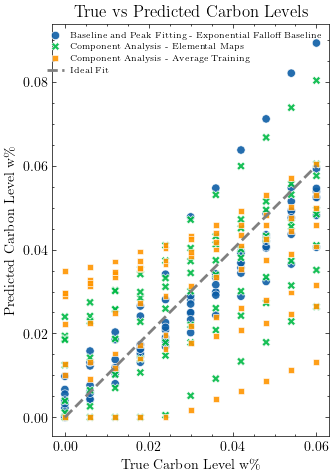

In [269]:
explode_and_graph(best_results.head(3), 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Levels',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%', 
                   'true_vs_predicted_carbon.png', style='method', hue='method')

In [270]:
carbon_level_results = analysis_results.copy()
carbon_level_results = carbon_level_results.sort_values(by=['mse'])
carbon_level_results = carbon_level_results[carbon_level_results['datasets used']=='Material Mixes']

In [283]:
print(carbon_level_results[['carbon level', 'method', 'mse']].pivot(index='carbon level', columns='method', values='mse').to_markdown())

| carbon level   |   Baseline and Peak Fitting - Exponential Falloff Baseline |   Baseline and Peak Fitting - linear Baseline |   Component Analysis - Average Training |   Component Analysis - Elemental Maps |   Convex Optimization |   Filtered Machine Learning |   Machine Learning |
|:---------------|-----------------------------------------------------------:|----------------------------------------------:|----------------------------------------:|--------------------------------------:|----------------------:|----------------------------:|-------------------:|
| Agricultural   |                                                7.65971e-05 |                                   0.000351535 |                             0.000343431 |                           0.000209907 |           0.000427226 |                  0.00369571 |        0.000366705 |
| All            |                                                0.014231    |                                   0.0347815   |                  

In [284]:
all_carbon_level_results = analysis_results.copy()
all_carbon_level_results = all_carbon_level_results.sort_values(by=['mse'])
all_carbon_level_results = all_carbon_level_results[all_carbon_level_results['datasets used']=='Material Mixes']
all_carbon_level_results = all_carbon_level_results[all_carbon_level_results['carbon level'] == 'All']

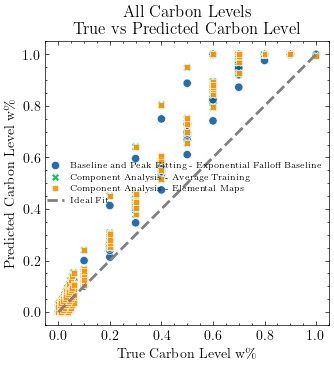

In [292]:
explode_and_graph(all_carbon_level_results.head(3), 'true_carbon', 'predicted_carbon', 
                   'All Carbon Levels\nTrue vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_component_analysis.jpg',
                   hue='method', style='method')

In [296]:
dataset_results = analysis_results.copy()
dataset_results = dataset_results.sort_values(by=['mse'])
dataset_results = dataset_results[dataset_results['carbon level'] == 'Agricultural']
print(dataset_results[['datasets used', 'method', 'mse']].pivot(index='datasets used', columns='method', values='mse').to_markdown())

| datasets used        |   Baseline and Peak Fitting - Exponential Falloff Baseline |   Baseline and Peak Fitting - linear Baseline |   Component Analysis - Average Training |   Component Analysis - Elemental Maps |   Convex Optimization |   Filtered Machine Learning |   Machine Learning |
|:---------------------|-----------------------------------------------------------:|----------------------------------------------:|----------------------------------------:|--------------------------------------:|----------------------:|----------------------------:|-------------------:|
| Convolution Training |                                                7.25777e-05 |                                   0.000350061 |                             0.000295299 |                           0.000191402 |           0.000293279 |                 0.000365072 |        0.000360802 |
| Feldspar             |                                                3.43383e-05 |                                   0.00036

# Baseline - Peak Fitting

In [239]:
peak_analysis_results = analysis_results[analysis_results['method group']=='Peak Fitting']
peak_analysis_results = peak_analysis_results.sort_values(by=['mse'])
peak_analysis_results = peak_analysis_results[peak_analysis_results['datasets used']=='Material Mixes']
peak_analysis_results = peak_analysis_results[peak_analysis_results['carbon level'] == 'Agricultural']

In [240]:
all_results_table(peak_analysis_results, focus=['method'])

| method                                                   |         mse |
|----------------------------------------------------------|-------------|
| Baseline and Peak Fitting - Exponential Falloff Baseline | 7.65971e-05 |
| Baseline and Peak Fitting - linear Baseline              | 0.000351535 |


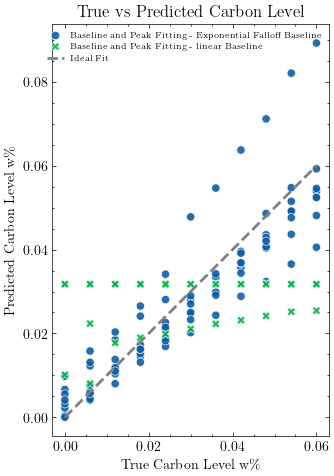

In [241]:
explode_and_graph(peak_analysis_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted.jpg',
                   hue='method',style='method')

In [242]:
peak_analysis_results.method.unique()

array(['Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Baseline and Peak Fitting - linear Baseline'], dtype=object)

In [243]:
c_lines_df = peak_analysis_results[peak_analysis_results['method']=='Baseline and Peak Fitting - Exponential Falloff Baseline'].sort_values(by='mse')['c_lines_df'].iloc[0]

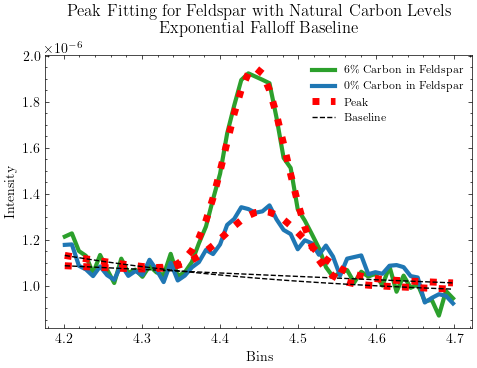

In [244]:
# %%
c_lines_df.columns
# filter to if the column contains 'Feldspar' or '7x7x7'
feldspar_columns = c_lines_df.filter(like='Feldspar').columns
seven_by_seven_columns = c_lines_df.filter(like='7x7x7').columns
both_columns = feldspar_columns.intersection(seven_by_seven_columns)

# %%
min_carbon_example_fitting_cols = ['7x7x7_Feldspar_001021 baseline', '7x7x7_Feldspar_001021 peak','7x7x7_Feldspar_001021 true',]
max_carbon_example_fitting_cols = ['7x7x7_C_0600_Feldspar_Fill_003142 baseline', '7x7x7_C_0600_Feldspar_Fill_003142 peak', '7x7x7_C_0600_Feldspar_Fill_003142 true']

# 140 mm wide, 90mm tall
# plt.rcParams['figure.figsize'] = [5.51, 3.54]
plt.figure(figsize=[5.51, 3.54])
# for col in min_carbon_example_fitting_cols:
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 true'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=1)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 true'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=1)

plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 peak'], label='Peak', color='red', linestyle='dotted', alpha=1, linewidth=5)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 baseline'], label='Baseline', color='black', linestyle='--', alpha=1)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 peak'], color='red', linestyle='dotted', alpha=1, linewidth=5)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 baseline'], color='black', linestyle='--', alpha=1)
plt.legend(
    fontsize=8
    )
plt.xlabel('Bins')
plt.ylabel('Intensity')
plt.title('Peak Fitting for Feldspar with Natural Carbon Levels\nExponential Falloff Baseline')
plt.savefig(figure_folder+'peak_fitting_feldspar.png', bbox_inches='tight')
plt.show()

# Component Analysis

In [245]:
analysis_results['method group'].unique()

array(['Peak Fitting', 'Component Analysis', nan, 'Machine Learning'],
      dtype=object)

In [246]:
component_analysis_results = analysis_results[analysis_results['method group']=='Component Analysis']
component_analysis_results = component_analysis_results.sort_values(by=['mse'])
component_analysis_results = component_analysis_results[component_analysis_results['datasets used']=='Material Mixes']
component_analysis_results = component_analysis_results[component_analysis_results['carbon level'] == 'Agricultural']

In [247]:
all_results_table(component_analysis_results, focus=['method'])

| method                                |         mse |
|---------------------------------------|-------------|
| Component Analysis - Elemental Maps   | 0.000209907 |
| Component Analysis - Average Training | 0.000343431 |


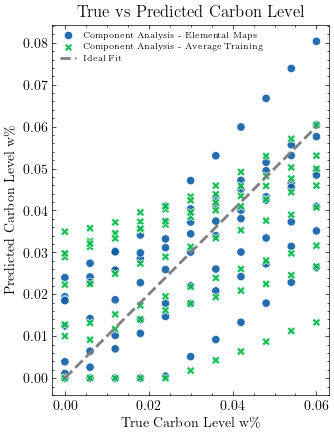

In [248]:
explode_and_graph(component_analysis_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_component_analysis.jpg',
                   hue='method',style='method')

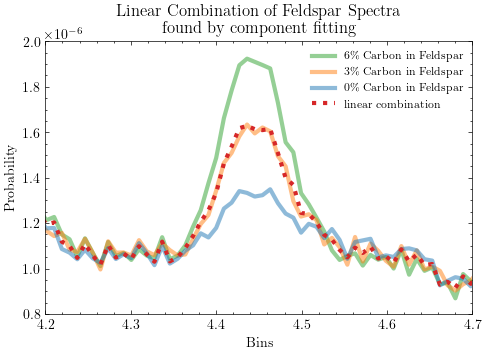

In [249]:
df = pd.read_pickle("../Data/DetectorReadings.pkl")
bins = df['bins'].values
_df = analysis_results[analysis_results['datasets used']=='Feldspar']
_df = _df[_df['method']=='Component Analysis - Average Training']

combined = (df['7x7x7_Feldspar_001021']*_df.iloc[0]['fitting_df'].loc['7x7x7_C_0300_Feldspar_Fill_003137']['average_min_carbon'])+(df['7x7x7_C_0600_Feldspar_Fill_003142']*_df.iloc[0]['fitting_df'].loc['7x7x7_C_0600_Feldspar_Fill_003142']['average_max_carbon'])

plt.figure(figsize=[5.51, 3.54])
plt.plot(bins, df['7x7x7_C_0600_Feldspar_Fill_003142'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
plt.plot(bins, df['7x7x7_C_0300_Feldspar_Fill_003137'], label='3\% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
plt.plot(bins, df['7x7x7_Feldspar_001021'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.plot(bins, combined, label='linear combination', color='tab:red', linewidth=3, linestyle='dotted')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.title('Linear Combination of Feldspar Spectra\nfound by component fitting')
plt.legend(fontsize=8)
plt.xlim(4.2, 4.7)
plt.ylim(8e-7, 2e-6)
plt.savefig(figure_folder+'linear_combination_feldspar.png', bbox_inches='tight')
plt.show()

# Convex Optimization

In [250]:
analysis_results.method.unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [251]:
convex_optimization_results = analysis_results[analysis_results['method']=='Convex Optimization']
convex_optimization_results = convex_optimization_results.sort_values(by=['mse'])
convex_optimization_results = convex_optimization_results[convex_optimization_results['datasets used']=='Material Mixes']
convex_optimization_results = convex_optimization_results[convex_optimization_results['carbon level'] == 'Agricultural']

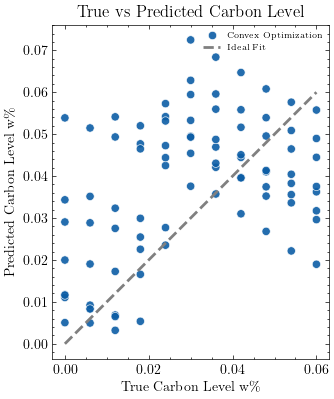

In [252]:
explode_and_graph(convex_optimization_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_convex_optimization.jpg',
                   hue='method', style='method')

In [253]:
all_results_table(convex_optimization_results, focus=['method'])


| method              |         mse |
|---------------------|-------------|
| Convex Optimization | 0.000427226 |


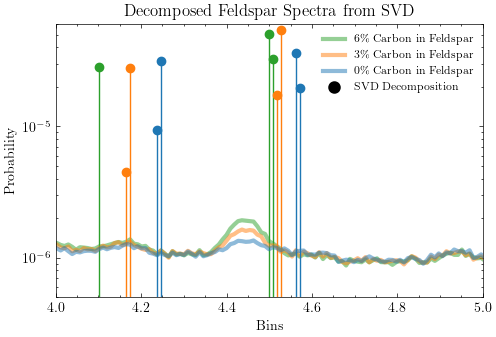

In [254]:
example_decomposed_df = analysis_results[analysis_results.method == 'Convex Optimization'].iloc[0]['decomposed_df'].T

# %%
example_decomposed_df

# %%
_df = _df[_df['method']=='Component Analysis - Average Training']

# %%
plt.figure(figsize=[5.51, 3.54])
plt.plot(bins, df['7x7x7_C_0600_Feldspar_Fill_003142'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_C_0600_Feldspar_Fill_003142'],'tab:green')
plt.plot(bins, df['7x7x7_C_0300_Feldspar_Fill_003137'], label='3\% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_C_0300_Feldspar_Fill_003137'], 'tab:orange')
plt.plot(bins, df['7x7x7_Feldspar_001021'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_Feldspar_001021'], 'tab:blue')
# make empty lines for legend
# plt.plot([], [], label='6% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
# plt.plot([], [], label='3% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
# plt.plot([], [], label='0% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.scatter([], [], label='SVD Decomposition', color='black', linewidth=3, alpha=1)
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.title('Decomposed Feldspar Spectra from SVD')
plt.legend(fontsize=8)
plt.yscale('log')
# plt.xlim(4.2, 4.7)
plt.xlim(4, 5)
plt.ylim(5e-7, 6e-5)
plt.savefig(figure_folder+'decomposed_feldspar_svd.jpg', bbox_inches='tight')
plt.show()

# Deep Learning

In [255]:
analysis_results.method.unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [256]:
analysis_results['method'].unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [257]:

ml_optimization_results = analysis_results[analysis_results['method']=='Machine Learning']
ml_optimization_results = ml_optimization_results.sort_values(by=['mse'])
ml_optimization_results = ml_optimization_results[ml_optimization_results['datasets used']=='Material Mixes']
ml_optimization_results = ml_optimization_results[ml_optimization_results['carbon level'] == 'Agricultural']

In [258]:
ml_optimization_results

,mse,r2,slope,intercept,fitting_df,carbon_fitting_df,si_fitting_df,c_lines_df,si_lines_df,peak_areas,...,training_carbon_portions,test_carbon_portions,decomposed_df,history,training_x,training_y,test_x,test_y,x_hat,id
12,0.000367,0.209325,799.198755,3.665082,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[-0.0046106703, -0.0045633274, -0.004552472, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.059...","[-0.0046106703, -0.0045633274, -0.004552472, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005...","[0.0, 0.018076496448849344, 0.0267521952779143...",12


In [260]:
all_results_table(ml_optimization_results, focus=['method'])

| method           |         mse |
|------------------|-------------|
| Machine Learning | 0.000366705 |


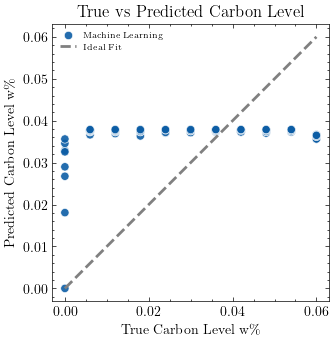

In [259]:
explode_and_graph(ml_optimization_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_ml_optimization.jpg',
                   hue='method', style='method')